# Titanic Dataset Analysis using Pandas  

we will perform data analysis using [Pandas](https://pandas.pydata.org/) on the [Titanic Dataset](titanic.csv) to answer the following questions:
1. **Which gender had a better chance of survival?**
2. **Which social class had a better chance of survival?**
3. **Which age group had a better chance of survival?**  
  
But before we answer these questions we need to understand the data and look for any issues that require data engineering.

In [105]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('titanic.csv')


# An idea about the dataset:

1. how many columns? 
2. what are they?

In [106]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
dataset.shape

(891, 12)

In [108]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**the columns 'Age', 'Cabin' and 'Embarked' contain null values.**
***

### **So we need to find an optimal solution to get rid of the null values.**


# 1. Age Feature


In [110]:
dataset['Age'].isna().sum()

177

### Ways to fill the missing 'Age' Values:  

There are a couple of easy methods where we consider all of the data to fill the null values, like:
- mode of all ages
- average of all ages
- median of all ages

**However, these methods are too general to be accurate.**  

---

A better approach would be to group the data based on features that seem relevant to age.  
  
so we will look at certain features and see how related they are to the age of the passenger:

1. **PassengerId**, **Name**, **Ticket**, **Fare**:

    These features are **not** related to the age of the passenger for the following reasons:
      - **PassengerId**, **Ticket**: the numbering system does not seem to be related to the age of the passanger. But, it might be related the time the ticket was issued and the ticket might be related to the embarked harbour.<br><br>

      - **Name**: the **Name** feature could be used alongside the **Parch** feature to determine if the passenger with a null age value has a parent or child on board and we can estimate the age based on that. However, it would be inefficent to look at passengers indvidually and determine the relationship. Moreover, this approach only returns the range of the age not an value we can fill the null value with. **This approach is inefficent and does not yield the result we need so we will not consider it.**<br><br> 
      
      - **Fare**: this feature has no relation to the age of the passenger.<br><br>
      
2. **Survived**, **Cabin**, **Embarked**: 

    These features are **not** related to the age of the passenger for the following reasons:
      - **Survived**: since it is one of the questions we need to answer, we should not consider it in the grouping strategy.<br><br>
      - **Cabin**: the **cabin** feature has too many null entries to be a viable approach. Furthermore, there are multiple passengers whose **cabin** attribute has multiple entires.<br><br>
      - **Embarked**: this feature only describes the harbour from which the passenger embarked.<br><br>


3. **Sex**, **Pclass**:

    These features are tangentially related to the age of the passenger for the following reasons:
      - **Sex**: it could be used as a condition in the grouping strategy to decrease the variance in the estimation.<br><br>
      - **Pclass**: it could be used as a condition in the grouping strategy to decrease the variance in the estimation.<br><br>

4. **Parch**, **SibSp**:

    shown below is the description of the **SibSp** and **Parch** taken from this [paper](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf) that defines the features of the dataset:
>With respect to the family relation variables (i.e. **sibsp** and parch) some relations were ignored.  
>The following are the definitions used for **sibsp** and parch:  
>  
>**Sibling**: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic  
>**Spouse**: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances
>Ignored) 
>  
>**Parent**: Mother or Father of Passenger Aboard Titanic  
>**Child**: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
>  
>*Other family relatives excluded from this study include cousins, nephews/nieces,
>aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0
>for them. As well, some travelled with very close friends or neighbors in a village,
>however, the definitions do not support such relations.*  

    **Given the definitions above,  the viability of these features is as follows:**
    - **Parch**: values > 2 means that the passenger has children, and as **Parch** increases we see that the age increases. So this feature is somewhat related to the age of the passenger, minus a few exceptions that are to small too include, **it is safe to say that this feature should be considered.**<br><br>

    - **SibSp**: this feature bares no relevance to age.


---


# Assumptions for the grouping criteria:

- **Sex** would be a good first grouping condition. 

- **Pclass** would be a good feature to further categorize the data to produce a more accurate estimation. 

- as **Parch** increases we can confidently assume that the age increases as well, since any value for **Parch** > 2 would mean that they have children. So as the most related feature to **Age**, selecting it as the final grouping criterion would yield a realistic estimation.  



In [111]:
mean_ages = dataset.groupby(['Sex','Pclass', 'Parch'])['Age'].median()
mean_ages

Sex     Pclass  Parch
female  1       0        35.0
                1        41.5
                2        22.0
        2       0        30.0
                1        25.0
                2        22.0
                3        39.0
        3       0        22.0
                1         9.0
                2         9.5
                3        36.0
                4        37.0
                5        39.0
                6        43.0
male    1       0        42.0
                1        43.5
                2        18.0
                4        64.0
        2       0        31.0
                1        13.5
                2        25.0
        3       0        26.0
                1        14.0
                2         9.0
                3        16.0
                4        40.0
                5        39.0
Name: Age, dtype: float64

In [112]:
def remove_null_ages(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'], row['Pclass'], row['Parch']]
    else:
        return row['Age']

In [113]:
dataset['Age'] = dataset.apply(remove_null_ages, axis=1)

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Now that all the null values in 'Age' have been filled, we will try to clean up the embarked feature.**

# 2. Embarked Feature


In [115]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There are only two passengers with null **Embarked** values and they have the following similarities:

- both survived
- both are in 1st class
- both are women
- both have neither children nor parents on board
- both have neither siblings nor spouses
- both have the same ticket number
- both have the same cabin number
  
  

Since the **Ticket** feature has a numbering system that is somewhat related to the **Embarked** Harbour. We can assume that passengers with similar ticket numbering embarked from the same harbour.

In [116]:
dataset.loc[(dataset['Ticket'].str.contains('1135')) & (dataset['Ticket'].str.len() == 6)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,41.5,0,1,113505,55.0000,E33,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,42.0,0,0,113510,35.0000,C128,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


it seems that the harbour with the ticket numbering system that most resembles the passengers in question is **'Southampton'**. 

In [117]:
dataset['Embarked'].fillna('S', inplace=True)

In [118]:
dataset.loc[dataset['Ticket'].str.contains('113572')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


**Now that all the null values in 'Embarked' have been filled, we will try to clean up the Cabin feature.**

---

# 3. Cabin Feature

As discussed in the **"Age"** feature clean-up. this feature has the following issues:
- too many null entries to estimate. <br><br>

- many passengers have multiple **Cabin** values.<br><br>


  
Furthermore, the **cabin feature** is not needed to answer any of the given questions, So:

**The best approach would be to delete this feature.**

In [119]:
dataset = dataset.drop(['Cabin'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Now that the data has been cleaned we can answer the given questions.

---

# 1. Which gender had a better chance of survival? <br><br>

  
**First we need to calculate the number of passengers grouped by their Sex**

In [120]:
dataset["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Now let us see the survivor count by Sex

In [121]:
pd.crosstab(dataset['Survived'], dataset['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


**It is obvious that the women had a better chance of survival.**

---

# 2. Which social class had a better chance of survival? <br><br>


In [122]:
pd.crosstab(dataset['Survived'], dataset['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [123]:
dataset.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

helpful information gleaned from the processing performed:<br><br>

- the 3rd (**Lower**) class had more passengers than all other classes.<br><br>

- the 3rd class had more survivors than the 2nd (**Middle**) class but less than the 1st (**Upper**) class.<br><br>

- the 3rd class had the lowest survival rate.<br><br>

- the 1st class had the highest survival rate.

---

# 3. Which age group had a better chance of survival?<br><br>

It would be more presentable and efficent to group the ages. Since we can present and compare groups of ages instead of individual ages.

In [124]:
dataset['Age'].max()

80.0

In [125]:
dataset[(dataset['Age'] > 70.0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [126]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
dataset['age_group'] = pd.cut(dataset.Age,range(0,81,10), right=False, labels=age_labels)

In [127]:
dataset['age_group'].value_counts()

20-29    337
30-39    186
40-49    111
10-19    105
0-9       78
50-59     48
60-69     19
70-79      6
Name: age_group, dtype: int64

Text(0.5, 0, 'Age Group')

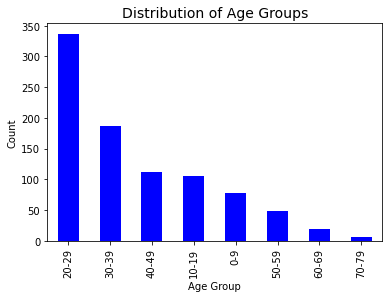

In [128]:
import matplotlib.pyplot as plt

dataset['age_group'].value_counts().plot.bar(color='b')

plt.title("Distribution of Age Groups", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Age Group")

We can notice that the majority of passengers were aged between 20-29

In [129]:
pd.crosstab(dataset['Survived'], dataset['age_group'])

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
Survived,,,,,,,,
0,38,62,230,101,71,28,13,6
1,40,43,107,85,40,20,6,0


In [130]:
dataset.groupby(['age_group']).Survived.mean()

age_group
0-9      0.512821
10-19    0.409524
20-29    0.317507
30-39    0.456989
40-49    0.360360
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64

**the age group (0-9) has the best chance of survival.**